<a href="https://colab.research.google.com/github/DiDevv/Portifolio-Data-Scientist/blob/main/An%C3%A1lise_Northwind_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados da Northwind Traders:** Previsão de Lucros para os próximos 30 dias com Séries Temporais, Segmentação de Clientes Churn e Insights de Anos Anteriores
-------------------

## **Sumário**



1. Introdução
2. Metodologia
   1. Coleta de Dados
   2. Ferramenta e Bibliotecas
   3. Pré-processamento de Dados
   4. Análise Exploratória de Dados
      1. Lucro Líquido da Empresa
      2. Lucro anual

        1.Ano de 1996

        2.Ano de 1997
        
        3.Ano de 1998

      3. Análise exploratória da Série temporal e Predição dos Lucros
        1. Teste de Estacionaridade  e Modelagem Matemática
        2. Modelagem de Aprendizado de Máquina
        3. Resultado da Previsão de Lucros
      4. Perfil dos Colaboradores da Empresa
      5. Perfil dos Distribuidores
        1. Filtrando conjuntos de Dados
        2. Resultados
      6. Análise de Venda de Produtos e Otimização de Estoque
        1. Filtrando conjunto de Dados
        2. Resultados
        3. Análise Prescritiva para Otimização de Estoque
      7. Perfil dos Clientes e Classificação de Churn
        1. Classificando os Clientes que deram Churn
        2. Procurando Correlações para o Churn - Coeficiente de Pierson
        3. Resultados
        
8. Análise Prescritiva geral e Conclusão


        
        
    
   


##  **1. Introdução**

### Contextualização

A Northwind Traders, uma empresa em expansão, está comprometida em adotar uma abordagem orientada por dados para suas decisões estratégicas.

--------------------
*Palavras Chaves:*
***análise de dados, previsão de séries temporais, análise exploratória, análise descritiva, análise prescritiva, modelos preditivos.***

----

### Objetivo

Este projeto visa realizar análises exploratórias, prescritivas e preditivas, apesar do número limitado de observações disponíveis. Foram utilizadas técnicas de análise de dados, com ênfase em **Séries Temporais**, **para compreender o comportamento histórico e prever lucros futuros.** Além disso, foi aplicado estatística descritiva e análise exploratória para observar o perfil dos colaboradores identificando padrões de desempenho, e perfil de clientes para caracterizar o comportamento de churn (perda de clientes). Essas análises visam proporcionar insights valiosos que orientem decisões estratégicas fundamentadas nos dados acumulados ao longo dos anos.

Para acessar os gráficos de forma interativa, basta acessar o link do notebook: [Notebook](https://https://colab.research.google.com/drive/1A-yCBvSkoXckP5k7_FHnzvXwXCGFeeXW?usp=sharing)

## **2. Metodologia**

### 1. Coleta de Dados e Dicionário de Variáveis

Os dados foram coletados do banco de dados da empresa.

**DICIONÁRIO DE VARIÁVEIS**

| Variável                   | Descrição                                                                                     |
|----------------------------|-----------------------------------------------------------------------------------------------|
| `order_df`                 | Trata do conjunto de dados que possui a tabela de ordem de vendas da empresa.                 |
| `order_details`            | Conjunto de dados que recebe a tabela de detalhes das ordens, onde lista a quantidade de produtos, categoria, preços e descontos. |
| `products_df_filtrados`    | Recebe a tabela de produtos filtradas com apenas as categorias de interesse para análises.    |
| `order_completa_df`        | Tabela de ordem que recebe todas as colunas de datasets anteriores, útil para eu filtrar conteúdos de próximas análises sem precisar importar tabela por tabela. |
| `order_filtrada_`          | Tabela de ordens com os principais itens de análises.                                         |
| `employees_df`             | Tabela de colaboradores.                                                                      |
| `vendas_por_colaborador`   | Vendas individuais de cada colaborador.                                                       |
| `vendas_totais_por_colaborador` | Todas as vendas feitas por cada colaborador.                                             |
| `employees_perfil`         | Tabela de perfil de colaboradores filtradas com base nas tabela de vendas totais.             |
| `anos_de_contratacao`      | Anos onde a empresa contratou novos colaboradores.                                            |
| `contagem_por_ano`         | Contagem de quantos colaboradores, por ano, a empresa contratou.                              |
| `colab_por_pais`           | Número de colaboradores em cada país.                                                         |
| `lucros_diarios`           | Lucros diários de cada venda.                                                                 |
| `lucro_diario_total`       | Lucro diário total das vendas de cada dia.                                                    |
| `lucro_semanal_total`      | Lucro semanal das vendas.                                                                     |
| `lucro_mensal_total`       | Lucro mensal completo das vendas.                                                             |
| `vendas_1996`              | Vendas totais por 1996.                                                                       |
| `vendas_1997`              | Vendas totais por 1997.                                                                       |
| `vendas_1998`              | Vendas totais por 1998.                                                                       |
| `vendas_totais_1996`       | Venda total feita em 1996.                                                                    |
| `vendas_totais_1997`       | Venda total feita em 1997.                                                                    |
| `vendas_totais_1998`       | Venda total feita em 1998.                                                                    |
| `lucro_medio_1996`         | Lucro médio da venda de 1996.                                                                 |
| `lucro_medio_1997`         | Lucro médio da venda de 1997.                                                                 |
| `lucro_medio_1998`         | Lucro médio da venda de 1998.                                                                 |
| `lucro_liquido`            | Lucro somado de todos os anos.                                                                |



### 2. Ferramentas e Bibliotecas

In [ ]:
#Para plotagem de gráficos mais bonitos e interativos no notebook
# O uso de '> /dev/null 2>&1' é para limpar a saída da celula
!pip install plotly > /dev/null 2>&1
# Para otimizar o tempo de escolha de um melhor modelo de predição para
# séries temporais
!pip install pycaret > /dev/null 2>&1

In [ ]:
# Importando bibliotecas

# Pandas e Numpy para processamento dos dados
import pandas as pd
import numpy as np

# Matplotlib, Seaborn e Plotly para visualização de dados
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

# Utilizando Pycaret para selecionar o melhor modelo estatístico para
# predição de séries temporais e StatsModels para decomposição dessas
# séries.
from pycaret.time_series import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pycaret.time_series import *


### 3. Pré-processamento

Uma **etapa crucial na análise de dados** é o pré-processamento, que envolve a preparação e limpeza dos dados brutos para torná-los adequados para análise. Nesta fase, **serão identificados e tratados os dados faltantes**, **aplicando técnicas matemáticas como interpolação** para resolver esses problemas. O pré-processamento garante que os dados estejam em um estado de alta qualidade, essencial para uma análise exploratória eficaz e para obter insights precisos.

In [ ]:
#Leitura dos conjuntos de dados necessários para as análises
order_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/orders.csv', sep=';')
order_details = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/order_details.csv', sep=';')
products_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/products.csv', sep=';')
categories_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/categories.csv', sep=';')
customers_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/customers.csv', sep=';')
employees_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/employees.csv', sep=';')
employees_territories_df = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/employee_territories.csv', sep=';')
shippers = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/shippers.csv', sep=';')
produtos = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/products.csv', sep=';')
categorias = pd.read_csv('/content/drive/MyDrive/Northwind Analysis/categories.csv', sep=';')

In [ ]:
# Lendo o arquivo csv
order_df.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [ ]:
# Observando o tamanho das linhas e colunas do conjunto de dados
order_df.shape

# Analisar a presença de dados ausentes no conjunto de dados e explorar
# estratégias eficazes para imputação dos mesmos.
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          830 non-null    int64  
 1   customer_id       830 non-null    object 
 2   employee_id       830 non-null    int64  
 3   order_date        830 non-null    object 
 4   required_date     830 non-null    object 
 5   shipped_date      809 non-null    object 
 6   ship_via          830 non-null    int64  
 7   freight           830 non-null    float64
 8   ship_name         830 non-null    object 
 9   ship_address      830 non-null    object 
 10  ship_city         830 non-null    object 
 11  ship_region       323 non-null    object 
 12  ship_postal_code  811 non-null    object 
 13  ship_country      830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


In [ ]:
# Corrigindo valores com formato incorreto e convertendo as datas para o tipo Datetime, anteriormente tratadas como objetos.
order_df['order_date'] = pd.to_datetime(order_df['order_date'])
order_df['shipped_date'] = pd.to_datetime(order_df['shipped_date'])
order_df['required_date'] = pd.to_datetime(order_df['required_date'])

# Ordenando os dados de forma crescente para análise da série temporal.
order_df = order_df.sort_values(by='order_date')

#Observando quantidade de valores nulos no conjunto de dados
order_df.isnull().sum()


order_id              0
customer_id           0
employee_id           0
order_date            0
required_date         0
shipped_date         21
ship_via              0
freight               0
ship_name             0
ship_address          0
ship_city             0
ship_region         507
ship_postal_code     19
ship_country          0
dtype: int64

In [ ]:
#Filtrando os dados faltantes da coluna 'shipped_date' (data de envio).
shipped_date_faltante = order_df[order_df['shipped_date'].isnull()]
shipped_date_faltante.isnull().sum()

order_id             0
customer_id          0
employee_id          0
order_date           0
required_date        0
shipped_date        21
ship_via             0
freight              0
ship_name            0
ship_address         0
ship_city            0
ship_region         12
ship_postal_code     0
ship_country         0
dtype: int64

"shipped_date" é uma variável importante que vou precisar  para minhas análises, então, para não perder 21 observações, irei inputar valores temporários com uma técnica matemática de interpolação, que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos.

--------

In [ ]:
# Aplicando um modelo de interpolação linear para sanar o problema de datas
# faltantes.
order_df['shipped_date'] = order_df['shipped_date'].interpolate(method='linear')

# Anotando alguns dos id's faltantes para verificar a inputação das datas.
ids_procurados = [11008, 11019, 11039, 11040, 11045]

order_df[order_df['order_id'].isin(ids_procurados)]


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
760,11008,ERNSH,7,1998-04-08,1998-05-06,1998-04-17 00:00:00,3,79.46,Ernst Handel,Kirchgasse 6,Graz,NaN,8010,Austria
771,11019,RANCH,6,1998-04-13,1998-05-11,1998-04-22 00:00:00,3,3.17,Rancho grande,Av. del Libertador 900,Buenos Aires,NaN,1010,Argentina
791,11039,LINOD,1,1998-04-21,1998-05-19,1998-04-29 12:00:00,2,65.00,LINO-Delicateses,Ave. 5 de Mayo Porlamar,I. de Margarita,Nueva Esparta,4980,Venezuela
792,11040,GREAL,4,1998-04-22,1998-05-20,1998-04-28 12:00:00,3,18.84,Great Lakes Food Market,2732 Baker Blvd.,Eugene,OR,97403,USA
797,11045,BOTTM,6,1998-04-23,1998-05-21,1998-04-27 12:00:00,2,70.58,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada


In [ ]:
#Resolvendo o problema de formatação das datas novas. (Removeno a hora inputada)
order_df['shipped_date'] =  pd.to_datetime(order_df['shipped_date']).dt.date
order_df['shipped_date'] = pd.to_datetime(order_df['shipped_date'])
order_df[order_df['order_id'].isin(ids_procurados)]

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
760,11008,ERNSH,7,1998-04-08,1998-05-06,1998-04-17,3,79.46,Ernst Handel,Kirchgasse 6,Graz,NaN,8010,Austria
771,11019,RANCH,6,1998-04-13,1998-05-11,1998-04-22,3,3.17,Rancho grande,Av. del Libertador 900,Buenos Aires,NaN,1010,Argentina
791,11039,LINOD,1,1998-04-21,1998-05-19,1998-04-29,2,65.00,LINO-Delicateses,Ave. 5 de Mayo Porlamar,I. de Margarita,Nueva Esparta,4980,Venezuela
792,11040,GREAL,4,1998-04-22,1998-05-20,1998-04-28,3,18.84,Great Lakes Food Market,2732 Baker Blvd.,Eugene,OR,97403,USA
797,11045,BOTTM,6,1998-04-23,1998-05-21,1998-04-27,2,70.58,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada


---------
Agora, o foco será analizar os dados de "ship_region", onde cerca de 507 dados que representam 60,24% do total do df possuem missing values. O foco da análise é descobrir se pelo menos esses dados possuem um código postal para que seja possível efetuar a entrega.

In [ ]:
# Analisando quantos dos dados faltantes em 'ship_region' ao menos possuem
# código postal para a entrega.
contage_valores_faltantes_com_codigo_postal = order_df[order_df['ship_region'].isnull() & order_df['ship_postal_code'].notnull()].shape[0]
contage_valores_faltantes_com_codigo_postal

507

Todos os dados de "ship_region" faltantes possuem código postal. Para evitar que as linhas fiquem vazias, adicionei o status "Pending". É necessário notificar a equipe responsável para entrar em contato com esses clientes e coletarem esses dados importantes.

In [ ]:
#Adicionando status de Pendente nas observações com 'ship_region' vazias.
order_df['ship_region'].fillna('Pending', inplace=True)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      830 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_region       830 non-null    object        
 12  ship_postal_code  811 non-null    object        
 13  ship_country      830 non-null    object        
dtypes: datetime64[ns](3), float64(1

In [ ]:
#Fazendo o mesmo para o código postal, que conta com 19 valores faltantes
ship_postal_code_missing = order_df[order_df['ship_postal_code'].isnull()]
ship_postal_code_missing.shape[0]

#Todos os 19 valores são do mesmo cliente
ship_postal_code_missing.head(19)

#Conferindo se há outros dados suficientes para efetuar entregas
customer_id = 'HUNGO'
customers_df[customers_df['customer_id'] == customer_id]


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
36,HUNGO,Hungry Owl All-Night Grocers,Patricia McKenna,Sales Associate,8 Johnstown Road,Cork,Co. Cork,NaN,Ireland,2967 542,2967 3333


O cliente possui informações sobre região, país, cidade e telefone, mas se faz necessário a coleta desse dado de forma urgente para que futuras complicações não ocorram.

In [ ]:
# Todos os dados ausentes refenrente as ordens forma tratados
order_df['ship_postal_code'].fillna('Pending', inplace=True)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      830 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_region       830 non-null    object        
 12  ship_postal_code  830 non-null    object        
 13  ship_country      830 non-null    object        
dtypes: datetime64[ns](3), float64(1

In [ ]:
# Não há dados duplicados
order_df.duplicated().sum()

#A partir daqui os dados da tabela "order_details" serão tratados.
order_details.head()

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [ ]:
order_details.shape[0]

2155

A tabela contém 2155 observações essenciais para a avaliação do lucro da empresa. Nela, estão registrados os preços dos produtos, quantidades vendidas e os descontos aplicados, oferecendo insights cruciais para análise financeira e estratégias de otimização.

In [ ]:
# Não possui dados vazios.
order_details.info()

# Não possui dados duplicados.
order_details.duplicated().sum()



# Adicionando uma nova coluna que calcula o preço total pago pelos produtos para cada cliente.
order_details['total_price'] = (order_details['unit_price'] * order_details['quantity'])

# Lucro Líquido = preço unitário * quantidade * disconto (em porcentagem)
order_details['profit'] = (order_details['unit_price'] * order_details['quantity']) * (1 - order_details['discount'])

#Organizando a visualização da coluna
ordem_de_coluna = ['order_id',	'product_id', 'quantity', 'unit_price', 'discount','total_price','profit'  ]
order_details[ordem_de_coluna].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


,order_id,product_id,quantity,unit_price,discount,total_price,profit
0,10248,11,12,14.0,0.0,168.0,168.0
1,10248,42,10,9.8,0.0,98.0,98.0
2,10248,72,5,34.8,0.0,174.0,174.0
3,10249,14,9,18.6,0.0,167.4,167.4
4,10249,51,40,42.4,0.0,1696.0,1696.0


In [ ]:
# Observando a tabela de produtos.
products_df.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [ ]:
# Variedade de produtos vendidos pela empresa (77).
products_df.shape[0]

# Filtrando colunas de interesse do meu conjunto de dados de produtos.
products_df_filtrados = products_df[['product_id', 'category_id', 'product_name', 'discontinued']]
products_df_filtrados.head()

# Utilizando a função merge do pandas para montar uma tabela de ordens
# 'completa', para me ajudar a filtrar dados desejados mais a frente.
order_completa_df = order_df.merge(order_details, on='order_id')
order_completa_df = products_df_filtrados.merge(order_completa_df, on='product_id')
order_completa_df.head()

# Analisando todas as colunas do do meu conjunto de dados 'order_completa'
order_completa_df.columns

# Criando uma ordem filtrada com alguns dados de interesse, através da minha
# ordem completa
order_filtrada_df = order_completa_df[['order_id','employee_id', 'customer_id', 'order_date', 'quantity', 'total_price', 'discount', 'ship_via', 'freight', 'profit', 'ship_country']]
order_filtrada_df = order_filtrada_df.sort_values(by='order_date')

order_filtrada_df.head()

order_filtrada_df.columns

order_filtrada_df

,order_id,employee_id,customer_id,order_date,quantity,total_price,discount,ship_via,freight,profit,ship_country
1108,10248,5,VINET,1996-07-04,10,98.00,0.00,3,32.38,98.0000,France
1967,10248,5,VINET,1996-07-04,5,174.00,0.00,3,32.38,174.0000,France
216,10248,5,VINET,1996-07-04,12,168.00,0.00,3,32.38,168.0000,France
308,10249,6,TOMSP,1996-07-05,9,167.40,0.00,1,11.61,167.4000,Germany
1289,10249,6,TOMSP,1996-07-05,40,1696.00,0.00,1,11.61,1696.0000,Germany
...,...,...,...,...,...,...,...,...,...,...,...
329,11077,1,RATTC,1998-05-06,1,23.25,0.03,2,8.53,22.5525,USA
1651,11077,1,RATTC,1998-05-06,2,68.00,0.06,2,8.53,63.9200,USA
378,11077,1,RATTC,1998-05-06,2,34.90,0.03,2,8.53,33.8530,USA
479,11076,4,BONAP,1998-05-06,10,92.00,0.25,2,38.28,69.0000,France


In [ ]:
# Processando o conjunto de dados referente aos colaboradores da empresa.

employees_df.head()

,employee_id,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address,city,region,postal_code,country,home_phone,extension,photo,notes,reports_to,photo_path
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,\x,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,\x,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,\x,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,\x,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [ ]:
# Transformando o id do colaborador em índice da tabela.
employees_df.set_index('employee_id', inplace=True)

employees_df.shape[0]

total_employees = employees_df.shape[0]

employees_df

# Traçando perfil dos colaboradores, filtrando pelo ultimo nome, data de
# contratação e país em que reside.
employees_perfil = employees_df[['last_name', 'hire_date', 'country']]
employees_perfil.head()

# Puxando os dados da tabela de ordem filtrada para associar o respectivo
# vendedor aos itens vendidos pela empresa.
employees_perfil_completo = order_filtrada_df.merge(employees_perfil, on='employee_id')
employees_perfil_completo

# Agora que todos os dados estão centralizados, posso filtrar outro conjunto de
# dados com base nos meus interesses específicos para análises mais precisas.
employees_perfil_filtrado = employees_perfil_completo[['order_id','order_date', 'employee_id','quantity','profit', 'last_name', 'hire_date', 'country']]
employees_perfil_filtrado

,order_id,order_date,employee_id,quantity,profit,last_name,hire_date,country
0,10248,1996-07-04,5,10,98.000,Buchanan,1993-10-17,UK
1,10248,1996-07-04,5,5,174.000,Buchanan,1993-10-17,UK
2,10248,1996-07-04,5,12,168.000,Buchanan,1993-10-17,UK
3,10254,1996-07-11,5,21,168.000,Buchanan,1993-10-17,UK
4,10254,1996-07-11,5,21,342.720,Buchanan,1993-10-17,UK
...,...,...,...,...,...,...,...,...
2150,11055,1998-04-28,7,20,1060.000,King,1994-01-02,UK
2151,11066,1998-05-01,7,35,490.000,King,1994-01-02,UK
2152,11066,1998-05-01,7,3,52.350,King,1994-01-02,UK
2153,11066,1998-05-01,7,42,386.400,King,1994-01-02,UK


In [ ]:
# Calculando as vendas de cada colaborador
vendas_por_colaborador = employees_perfil_filtrado[['order_id','order_date', 'employee_id', 'last_name']].value_counts().reset_index()
vendas_por_colaborador

# Calculando as vendas TOTAIS por cada colaborador
vendas_totais_por_colaborador = vendas_por_colaborador['employee_id'].value_counts()
vendas_totais_por_colaborador = vendas_totais_por_colaborador.reset_index()
vendas_totais_por_colaborador.set_index('employee_id', inplace=True)
vendas_totais_por_colaborador = vendas_totais_por_colaborador.sort_values(by='employee_id')
vendas_totais_por_colaborador

# Incorporando às informações do perfil do colaborador, incluirei as vendas
# totais de cada um para enriquecer nossa tabela de perfil.
employees_perfil['total_sales'] = vendas_totais_por_colaborador['count']
employees_perfil

,last_name,hire_date,country,total_sales
employee_id,,,,
1,Davolio,1992-05-01,USA,123
2,Fuller,1992-08-14,USA,96
3,Leverling,1992-04-01,USA,127
4,Peacock,1993-05-03,USA,156
5,Buchanan,1993-10-17,UK,42
6,Suyama,1993-10-17,UK,67
7,King,1994-01-02,UK,72
8,Callahan,1994-03-05,USA,104
9,Dodsworth,1994-11-15,UK,43


In [ ]:
# Observando quais foram os anos em que cada um foi contratado.
anos_de_contratacao = employees_perfil[['hire_date', 'last_name']]

# Extraindo só o ano para facilitar a contagem.
anos_de_contratacao['hire_date'] = pd.to_datetime(anos_de_contratacao['hire_date'])
anos_de_contratacao['hire_year'] = anos_de_contratacao['hire_date'].dt.year

# Removendo a coluna com datas completas e deixando apenas o ano para facilitar
# plotagens de gráficos.
anos_de_contratacao.drop(columns='hire_date', inplace=True)
anos_de_contratacao.head()

,last_name,hire_year
employee_id,,
1,Davolio,1992
2,Fuller,1992
3,Leverling,1992
4,Peacock,1993
5,Buchanan,1993


In [ ]:
# Quantas contratações foram feitas por ano.
contagem_por_ano = anos_de_contratacao['hire_year'].value_counts().reset_index()
contagem_por_ano.set_index('hire_year', inplace=True)
contagem_por_ano

,count
hire_year,
1992,3
1993,3
1994,3


In [ ]:
#Total de colaboradores por país
colab_por_pais = employees_perfil['country'].value_counts()
colab_por_pais = colab_por_pais.reset_index()
colab_por_pais = colab_por_pais.set_index('country')
colab_por_pais

,count
country,
USA,5
UK,4


In [ ]:
# Processamento de dados dos lucros da empresa.
filtro = ['order_date', 'profit']
lucros_diarios = order_filtrada_df.filter(filtro)
# Transformando a coluna 'order_date' em index.
lucros_diarios.set_index('order_date', inplace=True)
# Observando que o conjunto de dados agora é tratado como série temporal.
lucros_diarios.info()
# Esse lucro diário contém informações do lucro de cada venda feita no dia.
lucros_diarios.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2155 entries, 1996-07-04 to 1998-05-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   profit  2155 non-null   float64
dtypes: float64(1)
memory usage: 33.7 KB


,profit
order_date,
1996-07-04,98.0
1996-07-04,174.0
1996-07-04,168.0
1996-07-05,167.4
1996-07-05,1696.0


In [ ]:
# Observando o lucro diário total, por ter transformado a data em index
# anteriormente, agora posso usar a função resample para manipular meus dados
# como séries temporais.
# Esse lucro diário total trata do lucro total de todas as vendas feitas no dia.
lucro_diario_total = lucros_diarios.resample(rule='D').sum()
lucro_diario_total.tail()

,profit
order_date,
1998-05-02,0.0000
1998-05-03,0.0000
1998-05-04,2473.9300
1998-05-05,7632.4750
1998-05-06,2778.6555


In [ ]:
lucro_semanal_total = lucro_diario_total.resample(rule='W').sum()
lucro_semanal_total.tail()

,profit
order_date,
1998-04-12,21074.0450
1998-04-19,52976.8250
1998-04-26,15460.6250
1998-05-03,21720.4200
1998-05-10,12885.0605


In [ ]:
# Observando lucro mensal.
lucro_mensal = lucro_diario_total.resample(rule='M').sum()
lucro_mensal.tail()

,profit
order_date,
1998-01-31,94222.1105
1998-02-28,99415.2875
1998-03-31,104854.1550
1998-04-30,123798.6825
1998-05-31,18333.6305


In [ ]:
# Há apenas 23 meses de observação no conjunto de dados.
lucro_mensal.shape[0]

23

In [ ]:
# Vendas por ano.
vendas_1996 = lucro_mensal.loc['1996']
vendas_1997 = lucro_mensal.loc['1997']
vendas_1998 = lucro_mensal.loc['1998']

vendas_totais_1996 = vendas_1996['profit'].sum()
vendas_totais_1997 = vendas_1997['profit'].sum()
vendas_totais_1998 = vendas_1998['profit'].sum()

lucro_medio_1996 = vendas_1996['profit'].mean()
lucro_medio_1997 = vendas_1997['profit'].mean()
lucro_medio_1998 = vendas_1998['profit'].mean()

# Lucro líquido da empresa
lucro_liquido = lucros_diarios['profit'].sum()



### 4. Análise Exploratória

#### Lucro Líquido e Lucro Anual da Empresa

##### Lucro Líquido da Empresa

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = lucro_liquido,
    title = {'text': 'Lucro Líquido'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

Ao **analisar os dados** financeiros da empresa **no período entre o final de 1996 e o início de 1998**, foi **identificado um lucro líquido acumulado de 1,266 milhões**. Este valor merece destaque, pois **contrasta** significativamente **com a informação contida no relatório oficial da empresa, que afirma um lucro mensal de 1,5 milhões.**

Há uma necessidade urgente da realização de uma reunião detalhada para esclarecer e alinhar os números reportados com a realidade observada, garantindo assim maior transparência e confiabilidade nas demonstrações financeiras da empresa.

Adicionalmente, existe a **possibilidade de falhas na alocação desses dados no banco de dados**. Conforme demonstrado em **gráficos que serão apresentados posteriormente**, **há registros de colaboradores contratados nos anos de 1992, 1993 e 1994**, períodos em **que ainda não existiam registros de vendas**. Esta observação reforça a necessidade de uma análise minuciosa dos processos de registro e alocação de dados financeiros e operacionais.

##### Lucro anual

###### Ano de 1996

In [ ]:
fig = px.bar(vendas_1996, x=vendas_1996.index, y='profit', text_auto=True, title='Lucros mensais durante o Ano de 1996')
fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = lucro_medio_1996,
    title = {'text': 'Lucro médio mensal no ano de 1996'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = vendas_totais_1996,
    title = {'text': 'Lucro no ano de 1996 (6 meses de observações)'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

######  Ano de 1997

In [ ]:
fig = px.bar(vendas_1997, x=vendas_1997.index, y='profit', text_auto=True, title='Lucros mensais durante o Ano de 1997')
fig.show()


In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = lucro_medio_1997,
    title = {'text': 'Lucro médio mensal no ano de 1997'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = vendas_totais_1997,
    title = {'text': 'Lucro total no ano de 1997'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

######  Ano de 1988

In [ ]:
fig = px.bar(vendas_1998, x=vendas_1998.index, y='profit', text_auto=True, title='Lucros mensais durante o Ano de 1998')
fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = lucro_medio_1998,
    title = {'text': 'Lucro médio mensal no ano de 1998'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = vendas_totais_1998,
    title = {'text': 'Lucro no ano de 1998 (4 meses e 6 dias de observações)'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:
lucro_maio = lucro_mensal.loc['1998-05-31']
lucro_maio

profit    18333.6305
Name: 1998-05-31 00:00:00, dtype: float64

O lucro do mês de maio está incompleto, houveram poucos dias de observação.

###### Considerações

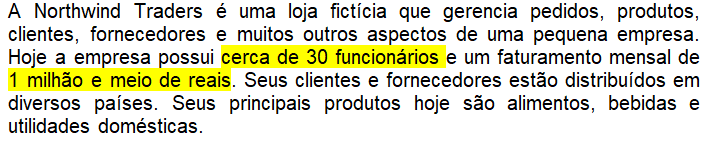

- **Lucro Líquido Acumulado** : O período de final de 1996 a início de 1998 apresentou um lucro líquido acumulado de 1,266 milhões, em contraste com o lucro mensal de 1,5 milhões reportado oficialmente pela empresa.

- **Discrepâncias nos Dados**: A diferença entre os dados analisados e os números reportados sugere a necessidade urgente de revisão das práticas de contabilidade e dos relatórios financeiros. Podem haver problemas na coleta de dados ou na metodologia de cálculo do lucro mensal.

- **Falhas no Registros de Dados**: Possíveis falhas no banco de dados foram identificadas, como registros de colaboradores contratados em 1992, 1993 e 1994, antes do início das vendas, indicando a necessidade de uma análise minuciosa dos processos de registro.

- **Registros Limitados de 1996**: Apenas seis registros mensais estão disponíveis para 1996, mas as vendas foram consistentes durante esses meses, indicando estabilidade apesar das lacunas nos dados.

- **Crescimento em 1997**: Os registros completos dos 12 meses de 1997 mostram algumas flutuações nas vendas, mas um crescimento de modo geral.

- **Dados de 1998**: Apesar dos dados limitados para 1998 (quatro meses e seis dias), as vendas atingiram 71,4% do total do ano anterior, indicando um crescimento significativo.

**Recomendação**: Uma reunião urgente para alinhar os números reportados com a realidade observada, assegurando maior transparência e confiabilidade nas demonstrações financeiras e nos registros de dados da empresa.

#### Análise exploratória da Série temporal e Predição dos Lucros

A **análise de séries temporais é** uma ferramenta **fundamental para compreender e prever comportamentos** de variáveis ao longo do tempo. No nosso contexto, **o objetivo é** analisar a série temporal dos lucros da empresa. Busco através dessa análise, **identificar padrões e tendências, assim como prever os lucros para os próximos 30 dias**. Esse insight é crucial para determinar se a empresa deve continuar com o planejamento atual ou considerar ajustes estratégicos para otimizar o desempenho financeiro.

In [ ]:
fig = px.line(lucro_diario_total, x=lucro_diario_total.index, y='profit', title='Lucro diário da empresa')
fig.show()


Esta é a **série temporal dos lucros diários da empresa**, registrada de **04-07-1996 a 06-05-1998**. Apesar de a série plotada inicialmente não revelar claramente padrões específicos, observa-se que os lucros estão aumentando ao longo do tempo. Para uma análise mais detalhada, será aplicada a **técnica de decomposição da série temporal**, que a dividirá em três componentes:

- **Tendência**: Reflete o movimento de longo prazo, indicando se os lucros estão crescendo ou diminuindo consistentemente ao longo do período.
- **Sazonalidade**: Captura padrões repetitivos e previsíveis que ocorrem em intervalos regulares, como variações sazonais ou mensais.
- **Resíduo**: Representa as flutuações irregulares e aleatórias na série temporal que não são explicadas pela tendência ou sazonalidade.

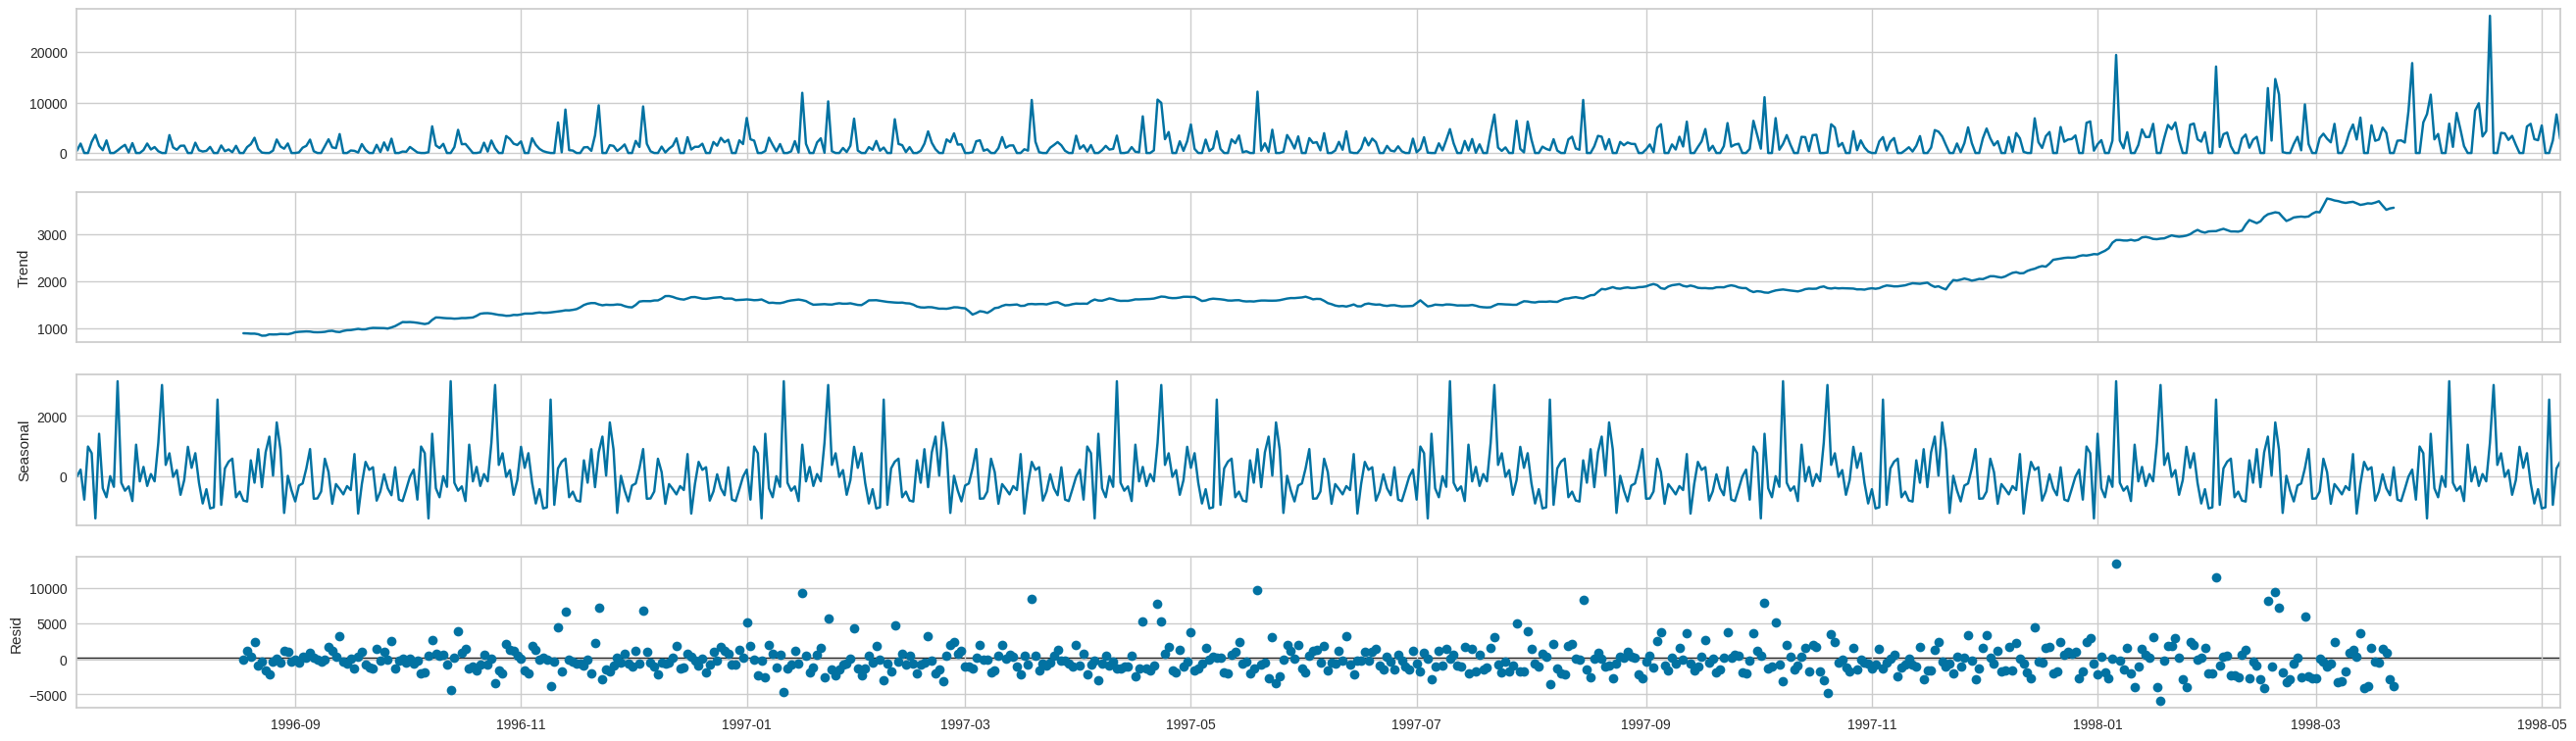

In [ ]:
decomposition = seasonal_decompose(lucro_diario_total, model='additive', period=90)
fig = decomposition.plot()
fig.set_size_inches(30, 8)
plt.show()


Com base nos lucros diários, agrupei a decomposição da série em períodos de 90 dias (3 meses) para facilitar a interpretação dos comportamentos. A análise revela o seguinte:

- **Tendência**: Há uma tendência geral de aumento nos lucros ao longo dos anos, indicando um crescimento consistente da empresa.

- **Sazonalidade**: A sazonalidade mostra que os trimestres com maiores picos de vendas são os primeiros do ano. Isso pode ser explicado por diversos fatores, como campanhas promocionais no início do ano, ou até mesmo aumentos sazonais na demanda dos consumidores após o período de festas.

- **Resíduo**: Ao observar os resíduos da série, é possível identificar flutuações aleatórias que sugerem comportamentos atípicos em determinados dias dos meses analisados. Esses resíduos podem ser atribuídos a eventos não recorrentes, como promoções específicas, problemas operacionais ou fatores externos inesperados.

##### Teste de Estacionaridade e Modelagem Matemática

Para **otimizar a análise e previsão** de séries temporais, utilizarei a biblioteca **PyCaret**. Essa biblioreca me permitirá **realizar testes estatísticos** e identificar os melhores **modelos preditivos**, economizando tempo e aumentando a eficiência do trabalho. Com a PyCaret, poderei automatizar grande parte do processo de modelagem, incluindo a avaliação e comparação de diferentes abordagens. Vale ressaltar que essa biblioteca é integrada com diversas outras bibliotecas para análises estatísticas e aprendizado de máquina, sendo ``scikit-learn`` uma das mais populares.

Importação e Inicialização do Setup:
Utilizei a função setup do PyCaret para preparar o ambiente de modelagem.
Essa função recebe alguns parâmetros e automaticamente faz a separação de um conjunto de treino e teste para validações do modelo de previsão.

Parâmetros Utilizados:

- **Dados**: A série temporal dos **lucros diários** (lucro_diario_total).
- **Horizonte de Previsão** (fh): **Definido como 30 dias**, especificando que quero prever os lucros para os próximos 30 dias.
- **Estratégia de Validação Cruzada** (fold_strategy): Utilizei **'sliding'**, que é uma técnica de validação cruzada deslizante. Esta estratégia é ideal para séries temporais, pois respeita a ordem temporal dos dados, garantindo que os pontos de teste estejam sempre no futuro dos pontos de treino.

In [ ]:
ts = setup(lucro_diario_total, fh= 30, fold_strategy='sliding')

,Description,Value
0,session_id,7846
1,Target,profit
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(672, 1)"
5,Transformed data shape,"(672, 1)"
6,Transformed train set shape,"(642, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


Usando a função `check_stats`, posso observar diversos testes estatísticos realizados na série temporal, como a **média, desvio padrão e testes de estacionaridade.**

**Série Estacionária**

Uma **série temporal é considerada estacionária quando suas propriedades estatísticas, como média e variância, permanecem constantes ao longo do tempo**. Isso é importante porque muitos métodos de modelagem de séries temporais, assumem que a série é estacionária para produzir previsões precisas.

**Importância da Estacionariedade**

- **Previsões Confiáveis**: Modelos ajustados a séries estacionárias tendem a fornecer previsões mais precisas e confiáveis.

**Teste de AD Fuller**

O **teste de Dickey-Fuller Aumentado** (AD Fuller) é utilizado para **determinar a estacionariedade de uma série temporal**. Ele testa a hipótese nula de que a série possui uma raiz unitária (ou seja, não é estacionária). Se o valor-p do teste for menor que um nível de significância escolhido (como 0.05), rejeitamos a hipótese nula e concluímos que a série é estacionária.

**Resultados dos principais Testes Estatísticos**



- **Lucro diário médio**: 1.883,62
- **Desvio padrão**: 2.717,60
- **Teste AD Fuller**:
  - **Valor-p**: Se o valor-p for menor que 0.05, a série é considerada estacionária e o valor encontrado foi ``0.283901``, ou seja, **a série não é estacionária.**

Com essas informações, posso **aplicar técnicas de estacionarização** para prosseguir para a etapa de modelagem estatística para a previsão dos lucros.

In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,672.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,1883.620594
3,Summary,Statistics,Transformed,Median,,1089.6
4,Summary,Statistics,Transformed,Standard Deviation,,2717.602319
5,Summary,Statistics,Transformed,Variance,,7385362.364573
6,Summary,Statistics,Transformed,Kurtosis,,18.242493
7,Summary,Statistics,Transformed,Skewness,,3.355284
8,Summary,Statistics,Transformed,# Distinct Values,,478.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",289.328855


--------
Existem várias **técnicas para tornar uma série temporal estacionária**, mas **a principal** delas **é a diferenciação**.

A diferenciação consiste em calcular as diferenças entre valores consecutivos da série temporal. Isso remove tendências e padrões sazonais, tornando a série mais estável ao longo do tempo.

Diferenciação
A diferenciação transforma a série original subtraindo cada valor do seu valor anterior. A fórmula para a primeira diferença é:
$$ y'_t = y_t - y_{t-1} $$

onde:

$$ y_t $$ é o valor original da série temporal no tempo,
$$ y'_t$$
  é o valor diferenciado no tempo e,

​$$y_t{-1}$$
  é o valor da série temporal no tempo.

Essa técnica **pode ser aplicada várias vezes** até que a série se torne estacionária, sendo chamadas de **diferenciações de ordem superior**. Aqui, só foi aplicada uma vez.

Benefícios da Diferenciação
- Remoção de Tendências: Elimina tendências de longo prazo, facilitando a modelagem.
- Estabilização da Variância: Reduz a variância ao longo do tempo, tornando a série mais previsível.
- Melhora a Estacionariedade: Aumenta a probabilidade de a série ser estacionária, atendendo aos requisitos de muitos modelos de séries temporais.

In [ ]:
lucro_diario_total_dif = lucro_diario_total.diff().dropna()
fig = px.line(lucro_diario_total_dif, x=lucro_diario_total_dif.index, y='profit', title='Lucro diário da empresa {Diferenciação de Primeira Ordem}')
fig.show()

-------------
Após aplicar a diferenciação de primeira ordem, o próximo passo é **realizar novamente os testes estatísticos** para determinar se a série temporal se tornou estacionária. **Caso os testes indiquem que ainda há não estacionariedade**, será **necessário continuar diferenciando** a série.

In [ ]:
ts = setup(lucro_diario_total_dif, fh = 30, fold_strategy='sliding')

,Description,Value
0,session_id,1641
1,Target,profit
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(671, 1)"
5,Transformed data shape,"(671, 1)"
6,Transformed train set shape,"(641, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,671.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,3.485329
3,Summary,Statistics,Transformed,Median,,0.0
4,Summary,Statistics,Transformed,Standard Deviation,,3623.344058
5,Summary,Statistics,Transformed,Variance,,13128622.159891
6,Summary,Statistics,Transformed,Kurtosis,,10.945408
7,Summary,Statistics,Transformed,Skewness,,-0.27703
8,Summary,Statistics,Transformed,# Distinct Values,,576.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",297.979821


##### Modelagem de Aprendizado de Máquina

------------------
Após confirmar que **a série se tornou estacionária** através do teste de AD Fuller no ``índice 15`` da lista anterior, o **próximo passo** é **selecionar o melhor modelo para previsão**. Neste ponto, a utilização do PyCaret se torna extremamente vantajosa, pois otimiza significativamente o tempo e o esforço necessários para encontrar o modelo mais adequado.

In [ ]:
melhor_modelo = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:19:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,1.3396,1.3380,3492.2408,5386.4660,8409256722726769.0000,1.9621,-0.0037,0.1233
polytrend,Polynomial Trend Forecaster,1.3423,1.3389,3499.2988,5389.8766,33466496093648860.0000,1.9321,-0.0049,0.1300
snaive,Seasonal Naive Forecaster,1.7562,1.6439,4621.0432,6678.5543,2.9788,1.0888,-0.6027,0.3667
arima,ARIMA,1.8462,1.6484,4841.9925,6690.3105,234687275372082560.0000,1.3908,-0.5992,0.8233
naive,Naive Forecaster,3.6777,2.6714,9369.8431,10499.2667,4904009165840462848.0000,1.7107,-3.4705,2.6700


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1293,1.1670,2952.0758,4715.7483,143520921103544960.0000,1.4632,0.2203,1.9567
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1421,1.1733,2979.8726,4737.5405,297768015607764672.0000,1.3270,0.2090,2.1367
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.1543,1.1458,3019.4011,4635.6919,443385139845485568.0000,1.3891,0.2419,1.3333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1687,1.1781,3050.4471,4751.2702,382203885893739584.0000,1.3448,0.2141,3.5267
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.1829,1.2049,3091.6508,4871.1149,573375476479849984.0000,1.3566,0.1590,2.0467
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.1829,1.2049,3091.6512,4871.1146,573371852582598080.0000,1.3566,0.1590,1.5733
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.1829,1.2049,3091.6508,4871.1149,573375472513025536.0000,1.3566,0.1590,1.3000
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.1829,1.2049,3091.6513,4871.1146,573371104542259136.0000,1.3566,0.1590,1.9667
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.1829,1.2049,3091.6513,4871.1145,573370717387223872.0000,1.3566,0.1590,1.4433
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1867,1.2049,3100.7846,4870.7144,529045736363379520.0000,1.3713,0.1590,1.2733


**Métricas Estatísticas para Avaliação de Modelos de Séries Temporais**

1. **SMAPE (Symmetric Mean Absolute Percentage Error)**: SMAPE mede a precisão das previsões em termos percentuais, sendo uma métrica simétrica que lida bem com séries temporais com valores próximos a zero. Um valor de SMAPE de 1.4632 indica uma precisão relativamente baixa, pois representa o erro médio percentual das previsões em relação aos valores reais. Esse método é extremamente sensível a valores extremos, e é por isso que no nosso caso está tão elevado, pois, principalmente nos dados do ultimo ano, há variações muito grandes nos lucros diários, e no comportamento da série diferenciada isso se torna ainda mais visível.

2. **MASE (Mean Absolute Scaled Error)**: MASE compara o erro absoluto médio do modelo com o erro de um modelo naive (por exemplo, média ou última observação), normalizando-o pela variabilidade da série temporal. Um valor de MASE de 1.1293 indica que o modelo selecionado tem um desempenho moderado em comparação com o modelo naive (modelo mais básico para previsões de série temporal).

3. **RMSSE (Root Mean Squared Scaled Error)**: RMSSE é uma versão escalonada do RMSE que normaliza o erro do modelo pelo erro de um modelo naive, levando em consideração a sazonalidade. Um valor de RMSSE de 1.1670 sugere que o modelo apresenta um desempenho aceitável em comparação com o modelo naive, considerando a sazonalidade da série.

- **R2 (Coeficiente de Determinação)**: Por mais que o modelo tenha performado de forma relativamente satisfatória, R2 é uma métrica comum em análises de regressão que mede a proporção da variabilidade da variável dependente explicada pelo modelo. Embora útil em alguns contextos, em séries temporais, outras métricas como SMAPE, MASE e RMSSE são mais adequadas para avaliar a precisão das previsões ao longo do tempo devido à natureza temporal dos dados.


**Modelo Selecionado**: Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending


- Orthogonal Matching Pursuit (OMP) para Séries Temporais Univariadas
OMP é um método que seleciona variáveis importantes para prever a variável de interesse. Para séries temporais univariadas, ele pode capturar padrões simples de curto e longo prazo. A técnica de desseazonalização e detrending antes de aplicar OMP ajuda a remover componentes sazonais e tendências, permitindo que o modelo identifique padrões relevantes na série temporal.

- Eficácia do Modelo
OMP é eficaz em séries com sazonalidade e tendências, melhorando a precisão das previsões de lucros futuros da empresa ao capturar padrões temporais importantes.



-----



In [ ]:
#Função que cria o modelo
modelo_previsao = create_model('omp_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01-06,1.0896,1.2331,2672.1524,4607.7556,189576206082865760.0000,1.4134,0.3718
1,1998-02-05,1.2182,1.2132,3178.6643,4944.1080,16841455601445502.0000,1.4484,0.0996
2,1998-03-07,1.0800,1.0548,3005.4106,4595.3812,224145101626323616.0000,1.5278,0.1895
Mean,NaT,1.1293,1.1670,2952.0758,4715.7483,143520921103544960.0000,1.4632,0.2203
SD,NaT,0.0630,0.0798,210.1936,161.5537,90680822558013264.0000,0.0478,0.1132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

------
É possível observar a **divisão dos dados** que o modelo utilizou para realizar a validação, separando entre **treino e teste**, na nossa série temporal.

In [ ]:
plot_model(modelo_previsao, plot='train_test_split')

-----
Agora, **o resultado do modelo**.

In [ ]:
plot_model(modelo_previsao)

É possível observar que o modelo teve um desempenho relativamente bom nos dados, especialmente nos dados finais onde houve menos variações. Variações significativas em nossas séries temporais não ocorrem com frequência regular e podem ser explicadas por fatores externos, como promoções e feriados.

In [ ]:
#Finalizando o modelo
modelo_final = finalize_model(modelo_previsao)

In [ ]:
modelo_final

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [21,
                                                                                                                                        20,
                                                                                                                                        19,
                                                                                                                                        18,
                                                                                                                                        17,
                                                                                                                                        16,
                                                                                                                                        15,
                                                                                                                                        14,
                                                                                                                                        13,
                                                                                                                                        12,
                                                                                                                                        11,
                                                                                                                                        10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=OrthogonalMatchingPursuit(),
                                                                                    sp=21,
                                                                                    window_length=21))]))])

In [ ]:
plot_model(modelo_final, plot='forecast', data_kwargs={'fh': 30})

In [ ]:
#Realizando a previsão para os próximos 30 dias.
predicoes = predict_model(modelo_final, fh=30)
predicoes.head()

,y_pred
1998-05-07,929.0151
1998-05-08,1963.1680
1998-05-09,-4181.9407
1998-05-10,371.5473
1998-05-11,3324.9675


In [ ]:
previsoes_diferenciadas = predicoes
previsoes_diferenciadas.head()
previsoes_diferenciadas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 30 entries, 1998-05-07 to 1998-06-05
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


------
**Quando fazemos previsões com dados diferenciados**, é crucial reverter essa diferenciação para apresentar as previsões no formato dos valores originais da série temporal.

$$ Y_t = Y'_t + Y_{t-1}$$

Para dados diferenciados uma vez, para reverter, basta somar o último valor conhecido da série original ao valor diferenciado atual. Assim, o valor original $$ Y_t $$ pode ser obtido como $$ Y_t = Y'_t + Y_{t-1} $$, onde $$ Y'_t $$ é o valor diferenciado atual e $$ Y_{t-1} $$ é o valor original anterior.

**Isso significa que para obter o valor original, você adiciona o valor diferenciado atual ao valor original anterior. E é isso que está sendo feito no código.**


In [ ]:
ultimo_valor_real = float(lucro_diario_total.iloc[-1])
ultimo_valor_real

2778.6555

In [ ]:
previsao_original = previsoes_diferenciadas.cumsum() + ultimo_valor_real
previsao_original.head()

,y_pred
1998-05-07,3707.6706
1998-05-08,5670.8386
1998-05-09,1488.8979
1998-05-10,1860.4452
1998-05-11,5185.4127


In [ ]:
historico_com_previsao = pd.concat([lucro_diario_total, previsao_original.reset_index(drop=True)], ignore_index=True)
historico_com_previsao

,profit,y_pred
0,440.00,NaN
1,1863.40,NaN
2,0.00,NaN
3,0.00,NaN
4,2206.66,NaN
...,...,...
697,NaN,4972.7936
698,NaN,4815.1301
699,NaN,5010.1346
700,NaN,4673.7324


In [ ]:
previsao_original.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 30 entries, 1998-05-07 to 1998-06-05
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [ ]:
previsao_original.index = previsao_original.index.to_timestamp()

##### Resultados da Previsão de Lucros

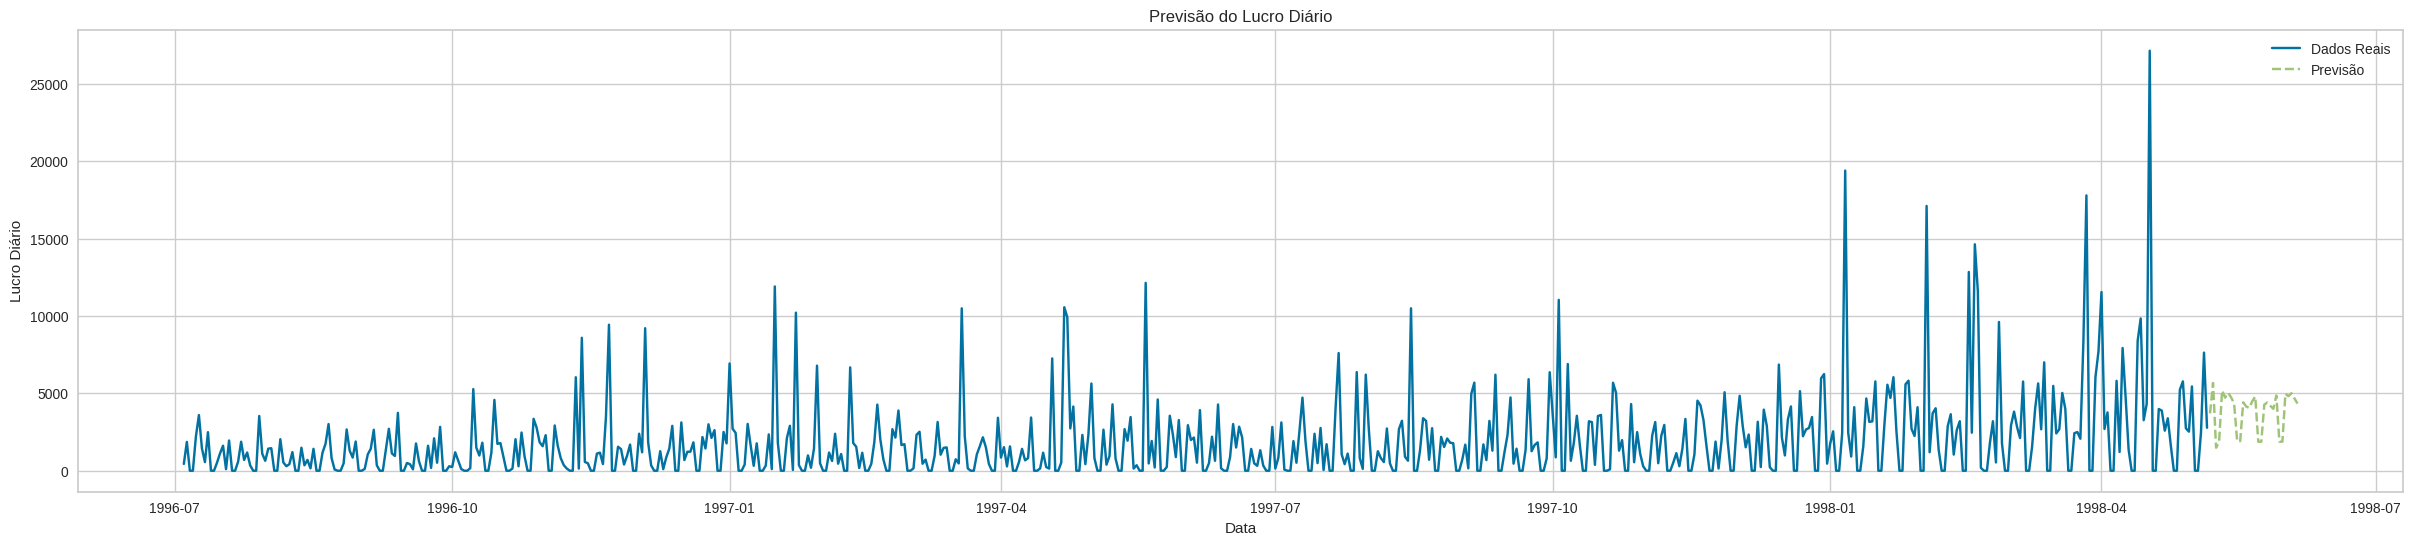

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(lucro_diario_total.index, lucro_diario_total, label='Dados Reais')
plt.plot(previsao_original.index, previsao_original, label='Previsão', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Lucro Diário')
plt.legend()
plt.title('Previsão do Lucro Diário')
plt.show()

Podemos observar a plotagem da previsão de forma geral, mas, **com o gráfico intuitivo da biblioteca Plotly**, é possível ampliar para ter uma noção de como os lucros dos próximos dias irão se comportar.

In [ ]:
fig = px.line(previsao_original, x=previsao_original.index, y='y_pred', title='Lucro previsto para os próximos 30 dias')
fig.show()

In [ ]:
previsao_original.mean()

y_pred    3850.77141
dtype: float64

Como é possível observar, o modelo não possui 100% de assertividade, tendo em vista que ele não identificou nenhum dia que vendeu zero produtos, o que vem acontecendo com certa frequencia durante a base de dados, porém, a curto prazo é um modelo que pode sim ser extremamente útil para avaliar se as métricas de vendas que a empresa está usando está funcionando e impactando os lucros de forma constante. E pelo que é possível ver, sim. Os lucros diários devem seguir numa média de 3850.77, extremamente satisfatória.

#### Perfil dos Colaboradores da Empresa

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = total_employees,
    title = {'text': 'Total de colaboradores cadastrados no sistema'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

**No relatório da empresa**, **é afirmado** que a empresa possui **um total de 30 colaboradores**. No entanto, **ao analisar a base de dados**, observa-se que **apenas nove colaboradores estão cadastrados**. Esta discrepância aponta para uma falta significativa de dados registrados no sistema. **É de extrema importancia que a equipe responsável pelo banco de dados realize o cadastramento imediato dos colaboradores restantes**. Esse procedimento é crucial para que análises mais precisas e assertivas possam ser realizadas, permitindo uma melhor gestão e tomada de decisões.

------

In [ ]:
fig = px.pie(colab_por_pais, values='count', names=colab_por_pais.index,
             title='País dos Colaboradores')

# Mostrar o gráfico
fig.show()

De acordo com os dados dos colaboradores cadastrados no sistema, a maioria, **55,6%, está localizada nos Estados Unidos**, enquanto **44,4% estão no Reino Unido.**

------

In [ ]:
fig = px.bar(employees_perfil, x='last_name', y='total_sales', text_auto=True, title='Total de Vendas por colaborador')
fig.show()

O objetivo agora é analisar o **total de vendas por colaborador**. Observa-se que **Peacock, Leverlin e Davolio** são, respectivamente, os **colaboradores com melhor desempenho em vendas**. Por outro lado, **Buchanan, Dodsworth, Suyama e King** apresentam os **menores desempenhos de vendas**.







In [ ]:
venda_media = employees_perfil['total_sales'].mean()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = venda_media,
    title = {'text': 'Venda média por colaborador'},
    gauge = {
        'bar': {'color': '#63A9FF'}
    },
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()

Uma forma eficaz de avaliar o desempenho geral dos colaboradores é comparando suas vendas individuais com a média de vendas da equipe. Caso um vendedor esteja abaixo dessa média, é aconselhável realizar uma conversa para entender melhor a situação. Esse diálogo pode revelar se há alguma dificuldade específica nas vendas e identificar as causas subjacentes. Com base nessas informações, será possível tomar decisões mais informadas e direcionadas para melhorar o desempenho de vendas, seja através de suporte adicional, treinamento ou outras medidas necessárias.

-----

In [ ]:
# Anos de contratação de todos os funcionários
anos_de_contratacao

,last_name,hire_year
employee_id,,
1,Davolio,1992
2,Fuller,1992
3,Leverling,1992
4,Peacock,1993
5,Buchanan,1993
6,Suyama,1993
7,King,1994
8,Callahan,1994
9,Dodsworth,1994


In [ ]:
fig = px.bar(contagem_por_ano, x=contagem_por_ano.index, y='count', text_auto=True, title="Contratações por ano")
fig.show()

Durante os três anos de observação (1992, 1993, 1994), a média de funcionários contratados anualmente foi de 3 funcionários por ano.
Os dados apontam que todos os colaboradores registrados foram contratados antes do período de dados de venda registrados no sistema, então, não dá pra saber se o impacto nas vendas foi de fato significativo ou não. Também é possível notar que desde 1994 a empresa não contrata mais ninguém..

#### Perfil dos distribuidores

In [ ]:
# Quantidade de distribuidores.
shippers

,shipper_id,company_name,phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931
3,4,Alliance Shippers,1-800-222-0451
4,5,UPS,1-800-782-7892
5,6,DHL,1-800-225-5345


Ao todo, temos seis distribuidoras. O objetivo é analisar os seguintes aspectos para cada uma delas:

1. **Países de Destino**: Identificar os países para os quais cada distribuidora envia produtos.
2. **Preço Médio de Frete**: Calcular o preço médio de frete para cada envio.
3. **Tempo Médio de Espera do Cliente**: Determinar o tempo médio de espera que cada cliente experimenta com cada distribuidora.
Essa análise permitirá uma compreensão detalhada do desempenho logístico de cada distribuidora, possibilitando a identificação de áreas para melhorias e otimização do serviço.







##### Filtrando conjuntos de dados para ajudar na análise

In [ ]:
#Filtrando do dataset 'order_completa_df', preparado anteriormente, apenas as colunas necessárias para análises posteriores.
an_ordem_envio = order_completa_df[['order_id',	'shipped_date','required_date','ship_via','freight','ship_country']]

#Renomeando a coluna 'ship_via' para 'shipper_id', já que seu conteúdo representa os IDs de cada transportadora.
an_ordem_envio.rename(columns={'ship_via': 'shipper_id'}, inplace=True)
an_ordem_envio

,order_id,shipped_date,required_date,shipper_id,freight,ship_country
0,10285,1996-08-26,1996-09-17,2,76.83,Germany
1,10294,1996-09-05,1996-09-27,2,147.26,USA
2,10317,1996-10-10,1996-10-28,1,12.69,USA
3,10348,1996-11-15,1996-12-05,2,0.78,Germany
4,10354,1996-11-20,1996-12-12,3,53.80,Mexico
...,...,...,...,...,...,...
2150,11000,1998-04-14,1998-05-04,3,55.12,USA
2151,11015,1998-04-20,1998-04-24,2,4.62,Norway
2152,11060,1998-05-04,1998-05-28,2,10.98,Italy
2153,11068,1998-05-05,1998-06-01,2,81.75,Brazil


In [ ]:
# Construindo uma tabela com nome e ID de cada transportadora.
shippers_completo = shippers[['shipper_id', 'company_name']]
shippers_completo

,shipper_id,company_name
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping
3,4,Alliance Shippers
4,5,UPS
5,6,DHL


In [ ]:
# Agora, com base no ID de cada transportadora, foi alocado seu respectivo nome
an_ordem_envio = an_ordem_envio.merge(shippers_completo, on='shipper_id')
an_ordem_envio

an_ordem_envio

,order_id,shipped_date,required_date,shipper_id,freight,ship_country,company_name
0,10285,1996-08-26,1996-09-17,2,76.83,Germany,United Package
1,10294,1996-09-05,1996-09-27,2,147.26,USA,United Package
2,10348,1996-11-15,1996-12-05,2,0.78,Germany,United Package
3,10370,1996-12-27,1996-12-31,2,1.17,Switzerland,United Package
4,10413,1997-01-16,1997-02-11,2,95.66,France,United Package
...,...,...,...,...,...,...,...
2150,10590,1997-07-14,1997-08-04,3,44.77,Canada,Federal Shipping
2151,10646,1997-09-03,1997-10-08,3,142.33,Ireland,Federal Shipping
2152,10835,1998-01-21,1998-02-12,3,69.53,Germany,Federal Shipping
2153,10885,1998-02-18,1998-03-12,3,5.64,Belgium,Federal Shipping


In [ ]:
#Analizar para quais países estamos enviando e a frequencia

#Primeiro, organizar as vendas por ordem de id para filtrar os endereços
frequencia_envios = an_ordem_envio.groupby(['shipper_id', 'company_name', 'ship_country']).size().reset_index(name='frequencia')
frequencia_envios

,shipper_id,company_name,ship_country,frequencia
0,1,Speedy Express,Argentina,8
1,1,Speedy Express,Austria,45
2,1,Speedy Express,Belgium,8
3,1,Speedy Express,Brazil,80
4,1,Speedy Express,Canada,9
...,...,...,...,...
58,3,Federal Shipping,Sweden,22
59,3,Federal Shipping,Switzerland,20
60,3,Federal Shipping,UK,50
61,3,Federal Shipping,USA,103


-------
Agora, o objetivo é **calcular o tempo médio de espera do cliente para cada transportadora, com o objetivo de tentar otimizar os envios.**

In [ ]:
# Aqui vou criar uma nova tabela para armazenar o tempo médio de espera dos clientes.
tempo_espera = an_ordem_envio[['order_id','shipped_date', 'required_date', 'shipper_id', 'ship_country', 'company_name']]
tempo_espera

,order_id,shipped_date,required_date,shipper_id,ship_country,company_name
0,10285,1996-08-26,1996-09-17,2,Germany,United Package
1,10294,1996-09-05,1996-09-27,2,USA,United Package
2,10348,1996-11-15,1996-12-05,2,Germany,United Package
3,10370,1996-12-27,1996-12-31,2,Switzerland,United Package
4,10413,1997-01-16,1997-02-11,2,France,United Package
...,...,...,...,...,...,...
2150,10590,1997-07-14,1997-08-04,3,Canada,Federal Shipping
2151,10646,1997-09-03,1997-10-08,3,Ireland,Federal Shipping
2152,10835,1998-01-21,1998-02-12,3,Germany,Federal Shipping
2153,10885,1998-02-18,1998-03-12,3,Belgium,Federal Shipping


In [ ]:
# Aqui, calculo o tempo de espera subtraindo a data de entrega esperada
# ('required_date') pela data de envio do produto ('shipped_date').
tempo_espera['lead time'] = (tempo_espera['required_date'] - tempo_espera['shipped_date']).dt.days
tempo_espera

,order_id,shipped_date,required_date,shipper_id,ship_country,company_name,lead time
0,10285,1996-08-26,1996-09-17,2,Germany,United Package,22
1,10294,1996-09-05,1996-09-27,2,USA,United Package,22
2,10348,1996-11-15,1996-12-05,2,Germany,United Package,20
3,10370,1996-12-27,1996-12-31,2,Switzerland,United Package,4
4,10413,1997-01-16,1997-02-11,2,France,United Package,26
...,...,...,...,...,...,...,...
2150,10590,1997-07-14,1997-08-04,3,Canada,Federal Shipping,21
2151,10646,1997-09-03,1997-10-08,3,Ireland,Federal Shipping,35
2152,10835,1998-01-21,1998-02-12,3,Germany,Federal Shipping,22
2153,10885,1998-02-18,1998-03-12,3,Belgium,Federal Shipping,22


In [ ]:
# Nessa nova tabela, armazeno o nome da distribuidora, o país de envio, e
# calculo a média do tempo de espera para cada país com base nos tempos de
# espera de cada pedido da tabela anterior.
tempo_medio_espera = tempo_espera.groupby(['company_name', 'ship_country'])['lead time'].mean().reset_index()
tempo_medio_espera

,company_name,ship_country,lead time
0,Federal Shipping,Argentina,17.285714
1,Federal Shipping,Austria,23.297297
2,Federal Shipping,Belgium,26.304348
3,Federal Shipping,Brazil,18.069767
4,Federal Shipping,Canada,21.666667
...,...,...,...
58,United Package,Sweden,16.975000
59,United Package,Switzerland,16.100000
60,United Package,UK,17.818182
61,United Package,USA,20.645963


------

Agora, **o objetivo é analisar o preço médio do frete dessas entregas**.

In [ ]:
# Criando uma tabela com o nome das distribuidoras, para onde estão enviando e a média do frete.
preco_medio_frete = an_ordem_envio.groupby(['company_name', 'ship_country'])['freight'].mean().reset_index()
preco_medio_frete

,company_name,ship_country,freight
0,Federal Shipping,Argentina,15.711429
1,Federal Shipping,Austria,177.393243
2,Federal Shipping,Belgium,47.734348
3,Federal Shipping,Brazil,51.746279
4,Federal Shipping,Canada,55.170000
...,...,...,...
58,United Package,Sweden,134.597000
59,United Package,Switzerland,52.337500
60,United Package,UK,63.634727
61,United Package,USA,124.359255


##### Resultados

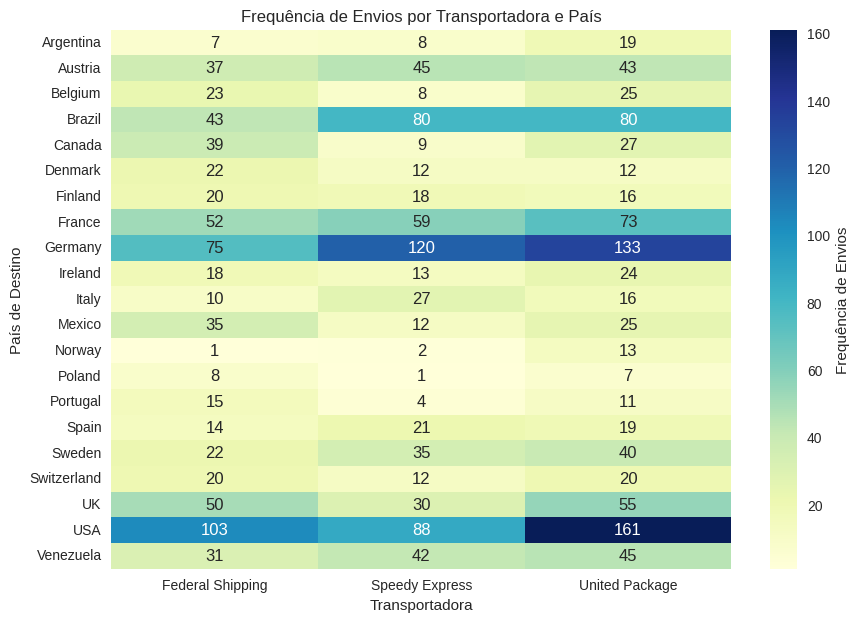

In [ ]:
# Plotagem de mapa de calor
pivot_df = frequencia_envios.pivot_table(index='ship_country', columns='company_name', values='frequencia', fill_value=0)
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequência de Envios'})
plt.title('Frequência de Envios por Transportadora e País')
plt.xlabel('Transportadora')
plt.ylabel('País de Destino')
plt.show()

O **mapa de calor nos permite visualizar a frequência com que cada transportadora envia produtos para os diversos países atendidos pela nossa empresa**.

Podemos observar que os **Estados Unidos apresentam uma alta densidade de envios por todas as transportadoras**, com a United Package sendo a que mais realiza envios.

**Na Alemanha, a Speedy Express e a United Package são as transportadoras mais utilizadas**.

**No Brasil, observa-se um comportamento semelhante ao da Alemanha**, com a Speedy Express e a United Package também predominando nos envios.

Esses três países - **Estados Unidos, Alemanha e Brasil - são os que possuem a maior taxa de compras na empresa**, conforme evidenciado pela alta frequência de envios. O gráfico de barras abaixo será melhor para visualizar esse comportamento.

In [ ]:
paises_mais_compram = an_ordem_envio.groupby('ship_country').size().reset_index(name='frequencia')
paises_mais_compram = paises_mais_compram.sort_values(by='frequencia', ascending=False)

fig = px.bar(paises_mais_compram, x='ship_country', y='frequencia', title='Países que mais compram no total')
fig.show()

Como mencionado anteriormente, **os Estados Unidos, Alemanha e Brasil são os três países que mais realizam compras na empresa**. Em contrapartida, Noruega, Polônia, Portugal e Argentina são os países que menos compram.







------
**Visualização do Tempo Médio de Espera**

In [ ]:
fig = px.bar(tempo_medio_espera,
             x='ship_country',
             y='lead time',
             color='company_name',
             title='Tempo Médio de Espera por Transportadora e País',
             labels={'ship_country': 'País de Destino', 'lead time': 'Tempo Médio de Espera (dias)', 'company_name': 'Transportadora'},
             text_auto=True)

# Mostrar o gráfico
fig.show()

**Com base nas informações sobre a média de tempo de entrega das transportadoras** por país, **podemos otimizar o processo de envio para cada localidade** e considerar a possibilidade de contratar novos serviços de transporte ou substituir os já existentes.

- **Nos Estados Unidos, Alemanha e Brasil**, observamos que os tempos de entrega não variam significativamente entre as transportadoras.

- **Em países como Bélgica e Polônia**, podemos ver diferenças significativas nos tempos de entrega entre as transportadoras. Por exemplo, **na Bélgica, a Speedy Express leva em média 13 dias para entregar, enquanto a Federal Shipping leva 26 dias** (13 dias a mais) **e a United Package leva 16 dias** (3 dias a mais). **Na Polônia**, a** United Package entrega em 9 dias**, enquanto a **Federal Shipping leva 19 dias** (10 dias a mais) e **a Speedy Express leva 20 dias** (11 dias a mais).

Com essas informações, é possível otimizar os envios avaliando o desempenho de cada transportadora em diferentes países. Isso pode incluir ajustes nas rotas de transporte, escolha de transportadoras mais eficientes para cada região ou até mesmo negociações para melhorar os serviços existentes. Isso pode impactar positivamente no lucro da empresa, pois, os clientes tendem a esperar menos tempo para entrega dos produtos e consequentemente comprarem mais.

-----
**Visualizando o Preço Médio do Frente pago pelos Clientes (por país)**




In [ ]:
fig = px.bar(preco_medio_frete,
             x='ship_country',
             y='freight',
             color='company_name',
             title='Custo médio de frete pago pelos clientes (por país) para cada transportadora',
             labels={'ship_country': 'País de Destino', 'freight': 'Custo Médio do Frete', 'company_name': 'Transportadora'},
             text_auto=True)

# Mostrar o gráfico
fig.show()

Quando comparamos o gráfico do custo médio de frete com o gráfico do tempo médio de entrega, observamos que **nem sempre os fretes mais caros garantem uma entrega mais rápida**. Portanto, **podemos otimizar os envios escolhendo transportadoras que cobram menos pelo serviço, garantindo que nossos clientes não paguem valores excessivos pelo frete ao comprar conosco**. Isso é crucial para manter a satisfação do cliente e evitar que eles deixem de fazer compras conosco.

#### Análise da Venda de Produtos e Otimização de estoque




##### Criação de Tabelas

In [ ]:
# Visualizando os primeiros itens da tabela de produtos
produtos.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


Beverages, Condiments, confections, dairy products, grains/cereals, meat/pultry, produce, seafoo

In [ ]:
# Visualizando a tabela de categorias
categorias

,category_id,category_name,description,picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",\x
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",\x
2,3,Confections,"Desserts, candies, and sweet breads",\x
3,4,Dairy Products,Cheeses,\x
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",\x
5,6,Meat/Poultry,Prepared meats,\x
6,7,Produce,Dried fruit and bean curd,\x
7,8,Seafood,Seaweed and fish,\x


In [ ]:
#organizando as vendas por categoria
vendas_por_categoria = order_completa_df[['category_id', 'order_date']]
#transformando em serie temporal
vendas_por_categoria.set_index('order_date', inplace=True)

In [ ]:
vendas_por_categoria.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2155 entries, 1996-08-20 to 1998-05-06
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   category_id  2155 non-null   int64
dtypes: int64(1)
memory usage: 33.7 KB


In [ ]:
vendas_por_categoria.head()
#Ordenando a série temporal de forma crescente
vendas_por_categoria.sort_index(inplace=True)
vendas_por_categoria

,category_id
order_date,
1996-07-04,5
1996-07-04,4
1996-07-04,4
1996-07-05,7
1996-07-05,7
...,...
1998-05-06,7
1998-05-06,4
1998-05-06,3


In [ ]:
quantidade_por_categoria = vendas_por_categoria.groupby('category_id').size()
quantidade_por_categoria.to_frame()

,0
category_id,
1,404
2,216
3,334
4,366
5,196
6,173
7,136
8,330


##### Resultados

As categorias são:

|1 - Bebidas| 2 - Condimentos| 3 - Doces| 4 - Laticínios | 5 - Grãos e Sereais| 6 - Carnes e Aves | 7 - Hortifruti | 8 - Frutos do Mar |
|--|---|----|---|----|----|----|----|

In [ ]:
fig = px.bar(quantidade_por_categoria, x=quantidade_por_categoria.index, y=quantidade_por_categoria, title='Lucro diário da empresa')
fig.show()

Podemos observar que as categorias de produtos mais vendidas pela empresa são Bebidas, Laticínios, Doces e Frutos do mar.

Por outro lado, a categoria de Hortifruti apresenta as vendas mais baixas, sugerindo que a empresa pode reduzir a compra de estoque dessa categoria de produto. Condimentos, grãos e cereais, assim como carnes/aves, também demonstram um índice de vendas relativamente baixo.

O objetivo da análise das séries temporais de cada categoria é identificar os dias da semana com maior demanda para otimizar o controle de estoque e garantir um crescimento contínuo do lucro da empresa.

**Para a análise das séries temporais a seguir, utilizei os calendários dos anos de 1996, 1997 e 1998, pelo site: [Calendário 365](https://www.calendario-365.com.br/calend%C3%A1rio-1996.html)**
A idéia é identificar um padrão na demanda de cada categoria.

A biblioteca Pyplot foi extremamente útil para dar interatividade aos gráficos. Gráficos interativos permitem uma análise mais minunciosa do comportamento dos dados.

###### Bebidas

In [ ]:
#Organizando os dados por categoria, primeiro filtrando cada categoria e depois organizando a venda por venda diária total.
bebidas = vendas_por_categoria[vendas_por_categoria['category_id'] == 1]
bebidas
bebidas = bebidas.resample('D').sum()
bebidas
decomposition = seasonal_decompose(bebidas, model='aditive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

-----
Gráfico interativo com Pyplot para ajudar a dar zoom na série temporal

In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'bebidas'
fig.add_trace(go.Scatter(x=bebidas.index, y=bebidas['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

Ampliando a série temporal, observa-se uma sazonalidade clara indicando que a maioria das vendas ocorre nos dias de segunda a sexta-feira, enquanto nos sábados e domingos as vendas são significativamente mais baixas.

Além disso, ao longo do período analisado, nota-se uma tendência geral de aumento nas vendas de bebidas.

---

###### Condimentos

In [ ]:
condimentos = vendas_por_categoria[vendas_por_categoria['category_id'] == 2]
condimentos = condimentos.resample('D').sum()
condimentos
decomposition = seasonal_decompose(condimentos, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'condimentos'
fig.add_trace(go.Scatter(x=condimentos.index, y=condimentos['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

É possível observar um padrão sazonal na série temporal de vendas de condimentos, onde os clientes tendem a comprar mais itens nas segundas e sextas-feiras. Nos demais dias da semana, as vendas apresentam uma queda significativa.

###### Doces

In [ ]:
confeccao = vendas_por_categoria[vendas_por_categoria['category_id'] == 3]

confeccao = confeccao.resample('D').sum()
confeccao

decomposition = seasonal_decompose(confeccao, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'condimentos'
fig.add_trace(go.Scatter(x=condimentos.index, y=condimentos['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

A venda de doces, assim como nas outras categorias mencionadas anteriormente, apresenta uma tendência de crescimento ao longo do tempo. Os dias de segunda-feira e sexta-feira destacam-se como os de maior demanda, enquanto os fins de semana registram menor movimento de vendas de doces na empresa.

###### Dia a Dia

In [ ]:
dia_a_dia = vendas_por_categoria[vendas_por_categoria['category_id'] == 4]

dia_a_dia = dia_a_dia.resample('D').sum()
dia_a_dia

decomposition = seasonal_decompose(dia_a_dia, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'dia_a_dia'
fig.add_trace(go.Scatter(x=dia_a_dia.index, y=dia_a_dia['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

Os produtos da categoria "Dia a Dia" apresentam um baixo índice de vendas nos primeiros dias do mês, com uma tendência crescente ao longo do tempo. Os dias úteis da semana se destacam como os dias com maior demanda para essa categoria, enquanto sábado e domingo registram uma demanda mais baixa.







###### Grãos e Cereais


In [ ]:
graos_cereais = vendas_por_categoria[vendas_por_categoria['category_id'] == 5]

graos_cereais = graos_cereais.resample('D').sum()
graos_cereais

decomposition = seasonal_decompose(graos_cereais, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'graos_cereais'
fig.add_trace(go.Scatter(x=graos_cereais.index, y=graos_cereais['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

Os dias de maior demanda para grãos e cereais são as segundas e quintas-feiras, enquanto os demais dias da semana geralmente apresentam uma adesão mais baixa às compras dessa categoria. Observa-se uma tendência crescente ao longo dos anos para as vendas de grãos e cereais.







###### Carnes

In [ ]:
carnes = vendas_por_categoria[vendas_por_categoria['category_id'] == 6]

carnes = carnes.resample('D').sum()
carnes

decomposition = seasonal_decompose(carnes, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'carnes'
fig.add_trace(go.Scatter(x=carnes.index, y=carnes['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

Os dias de maior compra de carnes são nas quartas e sextas-feiras, enquanto os demais dias geralmente apresentam uma adesão menor. Observa-se ao longo do tempo uma tendência crescente nas vendas desses produtos.

###### Hortifruti

In [ ]:
hortifruti = vendas_por_categoria[vendas_por_categoria['category_id'] == 7]

hortifruti = hortifruti.resample('D').sum()
hortifruti

decomposition = seasonal_decompose(hortifruti, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'hortifruti'
fig.add_trace(go.Scatter(x=hortifruti.index, y=hortifruti['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

A procura por produtos de hortifruti geralmente é alta de terça-feira a sábado, com o sábado sendo o dia de maior incidência de compras. Observa-se ao longo dos anos uma tendência de crescimento nas vendas dessa categoria de produtos.

###### algas e peixes

In [ ]:
frutos_do_mar = vendas_por_categoria[vendas_por_categoria['category_id'] == 8]

frutos_do_mar = frutos_do_mar.resample('D').sum()
frutos_do_mar

decomposition = seasonal_decompose(frutos_do_mar, model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [ ]:
# Criando subplots interativos com Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduos'))

# Adicionando trace para a série temporal original 'frutos_do_mar'
fig.add_trace(go.Scatter(x=frutos_do_mar.index, y=frutos_do_mar['category_id'], mode='lines', name='Original', line=dict(color='black')), row=1, col=1)

# Adicionando traces para cada componente da decomposição
fig.add_trace(go.Scatter(x=trend.index, y=trend.values, mode='lines', name='Tendência'), row=2, col=1)
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal.values, mode='lines', name='Sazonalidade'), row=3, col=1)
fig.add_trace(go.Scatter(x=residual.index, y=residual.values, mode='lines', name='Resíduos'), row=4, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title='Decomposição da Série Temporal com Série Original',
                  height=1000, width=1000)  # Ajuste o tamanho conforme necessário

fig.show()

A compra de frutos do mar é significativamente mais alta dos dias de terça-feira a sábado, sendo terça-feira o dia com o maior índice de compras. Observa-se uma tendência crescente na procura por essa categoria ao longo dos anos na empresa.

##### Análise Prescritiva para Otimização de Estoque

| Categoria       | Dias de Maior Demanda             | Tendência ao Longo do Tempo                    |
|-----------------|----------------------------------|------------------------------------------------|
| Condimentos     | Segundas e Sextas                | Padrão Sazonal; Considerar promoções específicas nestes dias. |
| Doces           | Segundas e Sextas                | Crescimento contínuo; Reforçar estoque para picos de vendas. |
| Dia a Dia       | Dias úteis (Segunda a Sexta)     | Tendência Crescente; Ajustar estoque para atender à demanda semanal. |
| Grãos e Cereais | Segundas e Quintas               | Crescimento ao Longo dos Anos; Explorar promoções em dias específicos. |
| Carnes          | Quartas e Sextas                 | Tendência Crescente; Oferecer variedade e qualidade constantes. |
| Frutos do Mar   | Terças a Sábados, com pico na Terça-feira | Crescimento Significativo; Expandir variedade de produtos. |


--------------

Análise:
Padrão Sazonal e Promoções Estratégicas:

Para produtos como Condimentos, que têm maior demanda às segundas e sextas-feiras, a empresa pode planejar promoções específicas nestes dias para impulsionar ainda mais as vendas. Isso pode incluir descontos por tempo limitado ou promoções de pacotes.
Gerenciamento de Estoque:

Categorias como Doces e Dia a Dia mostram uma tendência crescente ao longo do tempo. É crucial ajustar o gerenciamento de estoque para garantir que haja produtos suficientes disponíveis durante os picos de demanda, especialmente nos dias úteis da semana.
Promoções Estratégicas e Crescimento Contínuo:

Grãos e Cereais têm uma adesão mais forte às segundas e quintas-feiras, com um crescimento constante ao longo dos anos. A empresa pode explorar estratégias de promoção nestes dias para maximizar as vendas e o impacto positivo na receita.
Variedade e Qualidade:

Para categorias como Carnes e Frutos do Mar, que mostram padrões específicos de compra ao longo da semana, é essencial manter uma oferta consistente de variedade e qualidade para garantir a satisfação dos clientes e manter o crescimento nas vendas.
Implementar essas estratégias baseadas na análise das séries temporais pode ajudar a empresa a melhorar significativamente a otimização das vendas, atendendo melhor às demandas dos clientes e aproveitando ao máximo as oportunidades de mercado identificadas.

#### Perfil dos Clientes e classificação de Churn

O **objetivo** dessa análise é **identificar os clientes que não realizaram compras na empresa nos últimos 90 dia, considerando-os como "churn"**.

- Churn é o fenômeno de clientes que deixam de interagir ou fazer negócios com a empresa por um período prolongado. Essa métrica é crucial para entender a rotatividade de clientes e pode indicar falta de engajamento ou insatisfação, necessitando de estratégias para recuperar ou substituir esses clientes perdidos.

##### Classificando os Clientes que deram Churn

In [ ]:
# Aqui, estou criando um perfil com os dados dos clientes e ordenando pela data da ordem de vendas.
perfil_clientes = order_completa_df[['order_id','customer_id','order_date','ship_country']]
perfil_clientes.sort_values(by='order_date', inplace=True)
perfil_clientes_agrupado = perfil_clientes.groupby(['order_id', 'order_date'], as_index=False).first()
perfil_clientes_agrupado['order_date'] = pd.to_datetime(perfil_clientes_agrupado['order_date'])
perfil_clientes_agrupado_teste = perfil_clientes_agrupado.set_index('order_date')
perfil_clientes_agrupado_teste.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 830 entries, 1996-07-04 to 1998-05-06
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      830 non-null    int64 
 1   customer_id   830 non-null    object
 2   ship_country  830 non-null    object
dtypes: int64(1), object(2)
memory usage: 25.9+ KB


In [ ]:
perfil_clientes_agrupado

,order_id,order_date,customer_id,ship_country
0,10248,1996-07-04,VINET,France
1,10249,1996-07-05,TOMSP,Germany
2,10250,1996-07-08,HANAR,Brazil
3,10251,1996-07-08,VICTE,France
4,10252,1996-07-09,SUPRD,Belgium
...,...,...,...,...
825,11073,1998-05-05,PERIC,Mexico
826,11074,1998-05-06,SIMOB,Denmark
827,11075,1998-05-06,RICSU,Switzerland
828,11076,1998-05-06,BONAP,France


In [ ]:
# A partir do meu perfil de clientes, estou selecionando a data da ultima compra
ultima_compra_cliente = perfil_clientes_agrupado.groupby('customer_id')['order_date'].max().reset_index()
ultima_compra_cliente.columns = ['customer_id', 'UltimaCompra']

# A data da compra mais recente
data_mais_recente = perfil_clientes_agrupado['order_date'].max()

# E subtraindo a data mais recente, da ultima compra, eu tenho o tanto de dias
# que esse cliente não interage mais com a empresa
ultima_compra_cliente['Last purchase at'] = (data_mais_recente - ultima_compra_cliente['UltimaCompra']).dt.days
ultima_compra_cliente['Churn'] = ultima_compra_cliente['Last purchase at'].apply(lambda x: 1 if x > 90 else 0)
ultima_compra_cliente.value_counts('Churn')

Churn
0    73
1    16
Name: count, dtype: int64

16 clientes deram churn da empresa.

In [ ]:
# Classificando todos os clientes que deram churn
clientes_churn = ultima_compra_cliente[ultima_compra_cliente['Churn'] == 1]
clientes_churn

,customer_id,UltimaCompra,Last purchase at,Churn
2,ANTON,1998-01-28,98,1
6,BLONP,1998-01-12,114,1
12,CENTC,1996-07-18,657,1
15,CONSH,1998-01-23,103,1
20,FAMIA,1997-10-31,187,1
21,FOLIG,1997-12-22,135,1
31,GROSR,1997-12-18,139,1
34,HUNGC,1997-09-08,240,1
40,LAUGB,1998-01-01,125,1
41,LAZYK,1997-05-22,349,1


In [ ]:
# Aqui eu estou motando uma lista geral, com os clientes classificados como churn (1) e os não churn (0)
perfil_clientes_classificados = ultima_compra_cliente.merge(order_filtrada_df, on='customer_id')
perfil_clientes_classificados.sort_values(by='order_date', inplace=True)
perfil_clientes_classificados

,customer_id,UltimaCompra,Last purchase at,Churn,order_id,employee_id,order_date,quantity,total_price,discount,ship_via,freight,profit,ship_country
1990,VINET,1997-11-12,175,1,10248,5,1996-07-04,10,98.0,0.00,3,32.38,98.00,France
1991,VINET,1997-11-12,175,1,10248,5,1996-07-04,5,174.0,0.00,3,32.38,174.00,France
1992,VINET,1997-11-12,175,1,10248,5,1996-07-04,12,168.0,0.00,3,32.38,168.00,France
1869,TOMSP,1998-03-23,44,0,10249,6,1996-07-05,9,167.4,0.00,1,11.61,167.40,Germany
1870,TOMSP,1998-03-23,44,0,10249,6,1996-07-05,40,1696.0,0.00,1,11.61,1696.00,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,RICSU,1998-05-06,0,0,11075,8,1998-05-06,2,36.0,0.15,2,6.19,30.60,Switzerland
1512,RATTC,1998-05-06,0,0,11077,1,1998-05-06,1,30.0,0.05,2,8.53,28.50,USA
1511,RATTC,1998-05-06,0,0,11077,1,1998-05-06,1,25.0,0.02,2,8.53,24.50,USA
1518,RATTC,1998-05-06,0,0,11077,1,1998-05-06,4,24.0,0.00,2,8.53,24.00,USA


In [ ]:
# O objetivo aqui é filtrar apenas as colunas necessárias
perfil_clientes_classificados = perfil_clientes_classificados.groupby('order_id').agg({
    'customer_id': 'first',
    'order_date': 'first',
    'freight': 'first',
    'ship_country': 'first',
    'profit': 'sum',
    'Churn': 'first',
    'Last purchase at': 'first'
}).reset_index()
perfil_clientes_classificados  = perfil_clientes_classificados.merge(tempo_espera[['lead time', 'order_id']], on='order_id')
perfil_clientes_classificados

,order_id,customer_id,order_date,freight,ship_country,profit,Churn,Last purchase at,lead time
0,10248,VINET,1996-07-04,32.38,France,440.0000,1,175,16
1,10248,VINET,1996-07-04,32.38,France,440.0000,1,175,16
2,10248,VINET,1996-07-04,32.38,France,440.0000,1,175,16
3,10249,TOMSP,1996-07-05,11.61,Germany,1863.4000,0,44,37
4,10249,TOMSP,1996-07-05,11.61,Germany,1863.4000,0,44,37
...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,1998-05-06,8.53,USA,1255.7205,0,0,28
2151,11077,RATTC,1998-05-06,8.53,USA,1255.7205,0,0,28
2152,11077,RATTC,1998-05-06,8.53,USA,1255.7205,0,0,28
2153,11077,RATTC,1998-05-06,8.53,USA,1255.7205,0,0,28


In [ ]:
# Aqui, estou juntando todas as ordens iguais (referentes a mesma compra) em uma
# só, pois o interesse não é saber cada produto que o cliente comprou e sim a
# data da compra total.
perfil_clientes_classificados = perfil_clientes_classificados.groupby('order_id').agg({
    'customer_id': 'first',
    'order_date': 'first',
    'freight': 'first',
    'ship_country': 'first',
    'profit': 'sum',
    'Churn': 'first',
    'Last purchase at': 'first',
    'lead time':'first'

}).reset_index()
perfil_clientes_classificados.set_index('order_date', inplace=True)
perfil_clientes_classificados

,order_id,customer_id,freight,ship_country,profit,Churn,Last purchase at,lead time
order_date,,,,,,,,
1996-07-04,10248,VINET,32.38,France,1320.0000,1,175,16
1996-07-05,10249,TOMSP,11.61,Germany,3726.8000,0,44,37
1996-07-08,10250,HANAR,65.83,Brazil,4657.8000,0,9,24
1996-07-08,10251,VICTE,41.34,France,1962.1800,1,103,21
1996-07-09,10252,SUPRD,51.30,Belgium,10793.7000,0,15,26
...,...,...,...,...,...,...,...,...
1998-05-05,11073,PERIC,24.95,Mexico,600.0000,0,1,27
1998-05-06,11074,SIMOB,18.44,Denmark,232.0850,0,0,28
1998-05-06,11075,RICSU,6.19,Switzerland,1494.3000,0,0,28


In [ ]:
perfil_clientes_classificados.value_counts('Churn')

Churn
0    738
1     92
Name: count, dtype: int64

In [ ]:
clientes_churn = perfil_clientes_classificados[perfil_clientes_classificados['Churn'] == 1]

In [ ]:
# Separando os clientes por país
frequencia_pais_churn = clientes_churn.groupby('ship_country').size().reset_index(name='frequencia')
frequencia_pais_churn = frequencia_pais_churn.sort_values(by='frequencia', ascending=False)

##### Procurando Correlações para o Churn (Coeficiente de Pearson)

----
**O objetivo agora é analisar se há alguma correlação dos clientes que deram churn com o tempo de espera para receber os produtos.**

Para calcular a correlação entre as variáveis, irei utilizar o coeficiente de correlação de Pearson.

O coeficiente de correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Ele varia entre -1 e +1, onde:

- +1: Indica uma correlação positiva perfeita, ou seja, quando uma variável aumenta, a outra também aumenta na mesma proporção.
- 0: Indica ausência de correlação linear entre as variáveis.
- -1: Indica uma correlação negativa perfeita, ou seja, quando uma variável aumenta, a outra diminui na mesma proporção.

A fórmula do coeficiente de correlação de Pearson entre duas variáveis \( X \) e \( Y \) é dada por:

$$  r_{XY} = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}} $$

Onde:
$$( r_{XY}) $$ é o coeficiente de correlação entre \( X \) e \( Y \)

$$( X_i )  e ( Y_i )$$ são os valores individuais das amostras de \( X \) e \( Y \), e

$$( \bar{X} ) e ( \bar{Y} )$$ são as médias de \( X \) e \( Y \), respectivamente.

In [ ]:
correlacao = perfil_clientes_classificados['Churn'].corr(perfil_clientes_classificados['lead time'])
correlacao

0.06479140712042933

Um coeficiente de correlação de 0.06 significa que as duas variáveis não estão relacionadas linearmente de forma significativa, o que sugere uma associação extremamente fraca entre o tempo de espera pelo produto e o churn dos clientes.

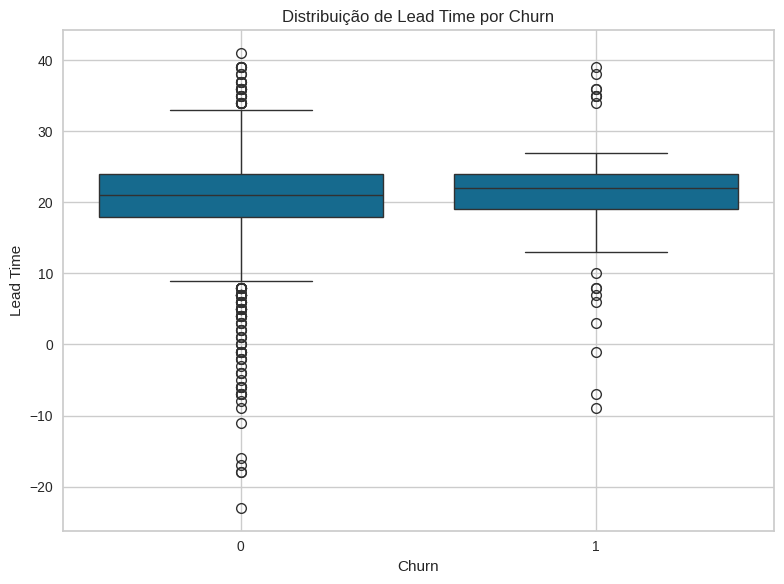

In [ ]:
# Plotar Boxplot ou Violin Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='lead time', data=perfil_clientes_classificados)
plt.title('Distribuição de Lead Time por Churn')
plt.xlabel('Churn')
plt.ylabel('Lead Time')
plt.grid(True)
plt.tight_layout()

plt.show()

Até porque o tempo de recebimento do produto, pelos clientes que deram churn, é ligeiramente menor do que o tempo de recebimento dos produtos pelos clientes que não deram churn.

Observando se há alguma correlação entre o frete do produto e o churn dos clientes.

In [ ]:
correlacao = perfil_clientes_classificados['Churn'].corr(perfil_clientes_classificados['freight'])
correlacao

-0.06150032587196306

E mais uma vez, **a correlação não é significativa.**

-------

##### Resultados

In [ ]:
fig = px.bar(frequencia_pais_churn, y='frequencia', x='ship_country', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)
fig.show()

**A maior parte dos clientes que deram churn  da empresa são da frança.**
Com o conjunto de dados mais limitados não dá pra classificar muito bem o motivo nem observar tantos padrões, mas, talvez aplicar alguns descontos em regiões onde os clientes mais deram churn os conquiste de alguma forma.
Analizei o tempo médio de espera para recebimento de produtos e todos estão em uma média ideal. Aplicar um sistema de coleta de feedback com os clientes com certeza ajudaria a empresa a identificar o churn da melhor forma possível.

----

Essas análises indicam que **o churn dos clientes pode estar relacionado a variáveis não exploradas até o momento**. **Para obter insights mais significativos** sobre os motivos que levam os clientes a permanecerem ou saírem da empresa, **seria interessante adotar um formulário de satisfação de forma recorrente.** Isso permitiria **capturar feedbacks diretamente dos clientes**, proporcionando uma compreensão mais profunda das suas necessidades e expectativas.

Além disso, **para aprimorar a análise de churn**, seria vantajoso **incluir novos dados no banco de dados**. Por **exemplo**, informações como: **o cliente possui cartão da empresa ou outros benefícios?**

A integração desses dados poderia **facilitar a identificação de padrões e correlações mais complexas relacionadas ao churn**. Fazendo com o que **técnicas de aprendizado de máquina possam ser utilizadas para capturar o padrão e prever quais dos clientes ativos podem vir a dar churn.**

## **3. Conclusão e Análise Prescritiva**

Com base nas análises realizadas, fica evidente que a principal oportunidade para a empresa Northwind Traders prosperar e alcançar um crescimento sustentável é melhorar a coleta e o armazenamento de dados de forma mais assertiva. A dificuldade em obter insights valiosos, como identificar características dos clientes que deram churn, foi diretamente relacionada à ausência dessas informações cruciais no banco de dados.

Embora existam diversas ferramentas matemáticas e estatísticas disponíveis, o sucesso das previsões e aplicações depende fundamentalmente de um volume maior e melhor categorizado de dados. Observa-se que os lucros da empresa estão em ascensão, indicando uma gestão competente, mesmo diante de dados não completamente estruturados. No entanto, a partir de agora, com um foco direcionado para a base de dados, há uma oportunidade significativa de otimizar ainda mais os lucros da empresa.

Participar deste direcionamento estratégico é extremamente gratificante para mim, pois acredito que a implementação eficiente de estratégias de dados será crucial para o futuro sucesso da Northwind Traders.